In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [52]:
df_modelisation = pd.read_csv('df2.csv')
df_modelisation.head()

,Unnamed: 0,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,...,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023,long
0,0,221900.0,1180,7,1180,1340,1.00,0,0,3,...,0,5650,0,0,5650,0,0,0,0,-122.257
1,1,538000.0,2570,7,2170,1690,2.25,0,400,3,...,0,7242,0,0,7639,0,0,0,0,-122.319
2,2,180000.0,770,6,770,2720,1.00,0,0,2,...,0,10000,0,0,8062,0,0,0,0,-122.233
3,3,604000.0,1960,7,1050,1360,3.00,0,910,4,...,0,5000,0,0,5000,0,0,0,0,-122.393
4,4,510000.0,1680,8,1680,1800,2.00,0,0,3,...,0,8080,0,0,7503,0,0,0,0,-122.045


### Sélection de modele

In [53]:

X = df_modelisation[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement',
'bedrooms','zipcode_98004','waterfront','floors','zipcode_98039','zipcode_98040','zipcode_98112','zipcode_98006',
'yr_renovated','zipcode_98033','zipcode_98105','sqft_lot','zipcode_98075','zipcode_98199','sqft_lot15','zipcode_98001',
'zipcode_98042','zipcode_98023']]
y = df_modelisation[['price']]

### Séparation des données en train, validation, test sets

In [54]:

#X = df_modelisation3.values
#y = df_modelisation2.price.values

#model.fit(X_train, y_train)
#model.score(X_test,y_test)

### Train Test Split

In [55]:
X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (17276, 25)
Test set: (4320, 25)


Normalisation 

In [56]:
X_minmax = MinMaxScaler().fit_transform(X).mean()
print(X_minmax)

0.0824005185264673


In [58]:
# Coefficient de détermination ( R2 carré)

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X, y)  # entrainer
model.score(X, y)  # evaluer 
#model.predict(X) # nouvelles predictions

0.8164130567310929

In [59]:
#model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X_train, y_train) 
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.8194625808808358
Test score: 0.7629610330787137


[ 1382  2764  4146  5528  6910  8292  9674 11056 12438 13820]


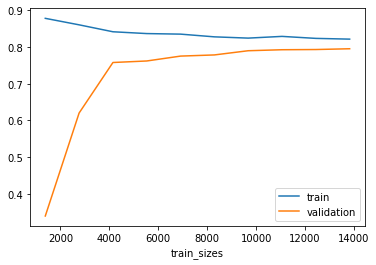

In [60]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Polynomial Features

Prediction 